In [1]:
## Based on
#  - https://machinelearningmastery.com/clustering-algorithms-with-python/
#  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [2]:
import sklearn
from sklearn import metrics

In [3]:
# synthetic classification dataset
from numpy import where, unique
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [4]:
num_clusters = 4

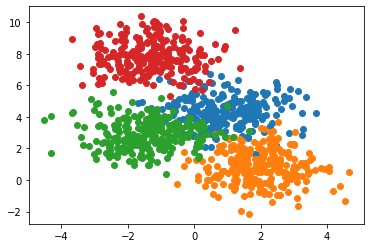

In [5]:
# Define dataset. Two ways to do it

# Approach #1
# - Details of function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
## Use num_clusters for number of clusters
#X, y = make_classification(n_samples=1000, n_classes=num_clusters, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Approach #2
# - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=1000, centers=num_clusters, n_features=2, random_state=0)

# create scatter plot for samples from each class
for class_value in range(num_clusters):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [6]:
# Import for clustering
import sklearn.cluster

In [7]:
def cluster_predict_show(model, X, y):
    
    # Fit the model
    m = model.fit(X)
    
    # assign a cluster to each example
    yhat = model.predict(X)
    
    # Silhoutte score - higher is a better cluster
    print ("Cluster score = ", metrics.silhouette_score(X, m.labels_, metric='euclidean'))

    # retrieve unique clusters
    clusters = unique(yhat)

    # create scatter plot for samples from each cluster
    for cluster in clusters:

        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)

        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.show()

In [8]:
def cluster_fitpredict_show(model, X, y):
    
    # assign a cluster to each example
    yhat = model.fit_predict(X)
    
    # Silhoutte score - higher is a better cluster
    print ("Cluster score = ", metrics.silhouette_score(X, yhat, metric='euclidean'))

    # retrieve unique clusters
    clusters = unique(yhat)

    # create scatter plot for samples from each cluster
    for cluster in clusters:

        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)

        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.show()

/Users/biplavs/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Cluster score =  0.3303930057271466
CPU times: user 1.25 s, sys: 30.2 ms, total: 1.28 s
Wall time: 1.04 s


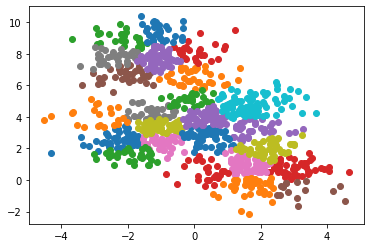

In [9]:
%%time
# define a clustering model and show results
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
cluster_predict_show(model, X, y)

Cluster score =  0.496260953991831
CPU times: user 263 ms, sys: 15.5 ms, total: 279 ms
Wall time: 90 ms


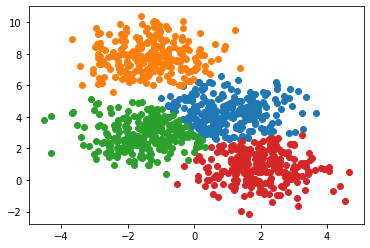

In [10]:
%%time
# define a clustering model and show results
from sklearn.cluster import KMeans
model = KMeans(n_clusters=num_clusters)
cluster_predict_show(model, X, y)

Cluster score =  0.4841452453282493
CPU times: user 164 ms, sys: 10.1 ms, total: 174 ms
Wall time: 129 ms


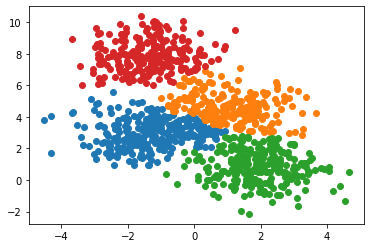

In [11]:
%%time
# define a clustering model and show results
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=num_clusters)
cluster_predict_show(model, X, y)

Cluster score =  -0.28774061737016426
CPU times: user 90.9 ms, sys: 3.67 ms, total: 94.6 ms
Wall time: 61.4 ms


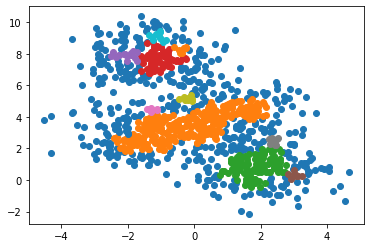

In [12]:
%%time
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
cluster_fitpredict_show(model, X, y)

Cluster score =  0.46559217746168075
CPU times: user 96.8 ms, sys: 8.11 ms, total: 105 ms
Wall time: 69 ms


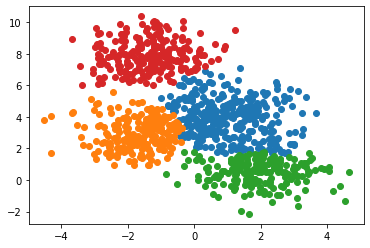

In [13]:
%%time
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_fitpredict_show(model, X, y)
